In [5]:
from sympy import *
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from scipy.ndimage import gaussian_filter, median_filter
from scipy.signal import wiener
from skimage.util import random_noise
from skimage import io
from skimage.transform import rescale, rotate

<h5 style="font-style:italic; font-size:16px;">Exercise 1 - Compute √2 with 100 decimal digits</h5>

In [2]:
result = N(sqrt(2), 100)
print(result)

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573


<h5 style="font-style:italic; font-size:16px;">Exercise 2 - Compute 1/2 + 1/3 using rational arithmetic</h5>

In [3]:
result = Rational(1, 2) + Rational(1, 3)
print(result)

5/6


<h5 style="font-style:italic; font-size:16px;">Exercise 3 - Expand the expression (x + y)^6</h5>

In [4]:
x, y = symbols('x y')

result = expand((x + y)**6)
print(result)


x**6 + 6*x**5*y + 15*x**4*y**2 + 20*x**3*y**3 + 15*x**2*y**4 + 6*x*y**5 + y**6


<h5 style="font-style:italic; font-size:16px;">Exercise 4 - Simplify the trigonometric expression sin(x)/cos(x)</h5>

In [3]:
x = symbols('x')

result = simplify(sin(x)/cos(x))
print(result)

tan(x)


<h5 style="font-style:italic; font-size:16px;">Exercise 5 - Compute the limit lim(x→0) sin(x)/x</h5>

In [4]:
x = symbols('x')

result = limit(sin(x)/x, x, 0)
print(result)

1


<h5 style="font-style:italic; font-size:16px;">Exercise 6 - Compute the derivative of log(x) with respect to x</h5>

In [5]:
x = symbols('x')

result = diff(log(x), x)
print(result)

1/x


<h5 style="font-style:italic; font-size:16px;">Exercise 7 - Solve the system of equations: 2x + 3y = 5, 4x - 3y = -4</h5>

In [6]:
x, y = symbols('x y')

eq1 = Eq(2*x + 3*y, 5)
eq2 = Eq(4*x - 3*y, -4)

result = solve((eq1, eq2), (x, y))
print(result)

{x: 1/6, y: 14/9}


<h5 style="font-style:italic; font-size:16px;">Exercise 8 - Check if there exist Boolean values x, y that satisfy (x ∨ ¬y) ∧ (y ∨ ¬x) using sym.satisfiable</h5>

In [7]:
x, y = symbols('x y')

expr = And(Or(x, Not(y)), Or(y, Not(x)))

result = satisfiable(expr)
print(result)

{x: False, y: False}


<h5 style="font-style:italic; font-size:16px;">Exercise 9 - Solve Bernoulli differential equation x*df(x)/dx + f(x) - f(x)^2 = 0 using hint='Bernoulli'</h5>

In [10]:
x = symbols('x')
f = Function('f')(x)

eq = Eq(x*f.diff(x) + f - f**2, 0)

In [11]:
result = dsolve(eq)
print(result)

Eq(f(x), -1/(C1*x - 1))


In [12]:
result_hint = dsolve(eq, hint='Bernoulli')
print(result_hint)

Eq(f(x), 1/(C1*x + 1))


<h5 style="font-style:italic; font-size:16px;">Exercise 10 - Numerically evaluate the integral I = ∫0^1 cos(2πx) dx using scipy.quad</h5>

In [1]:
def integrand(x):
    return np.cos(2 * np.pi * x)

In [ ]:
result, error = quad(integrand, 0, 1)

print(f"Integral result: {result}")
print(f"Estimated error: {error}")

Integral result: 4.163336342344337e-17
Estimated error: 7.116990625963435e-15


<h5 style="font-style:italic; font-size:16px;">Exercise 11 - Create a signal from overlapping sine waves (50Hz & 70Hz) and plot the Fourier transform</h5>

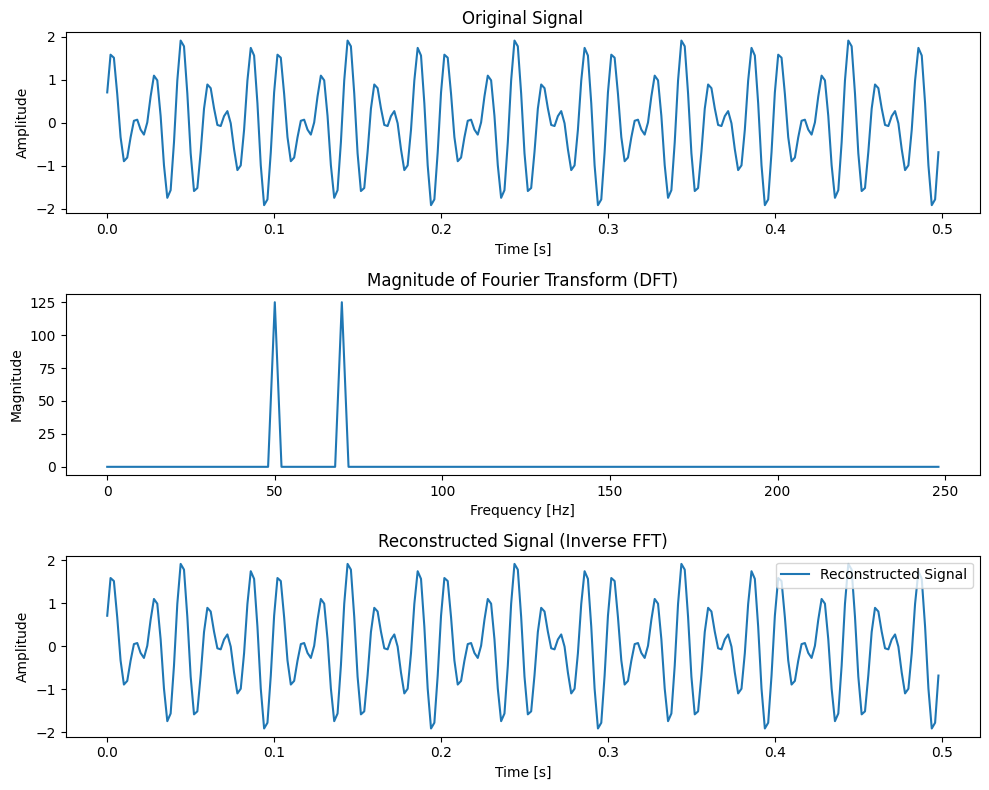

In [6]:
fs = 500               
T = 0.5                
t = np.linspace(0, T, int(fs * T), endpoint=False)

f1, f2 = 50, 70
phi = np.pi / 4

signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t + phi)

fft_signal = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(t), 1/fs)

magnitude = np.abs(fft_signal)

positive_freqs = frequencies[:len(frequencies)//2]
positive_magnitude = magnitude[:len(magnitude)//2]

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title("Original Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(positive_freqs, positive_magnitude)
plt.title("Magnitude of Fourier Transform (DFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")

reconstructed_signal = np.fft.ifft(fft_signal).real
plt.subplot(3, 1, 3)
plt.plot(t, reconstructed_signal, label="Reconstructed Signal")
plt.title("Reconstructed Signal (Inverse FFT)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

<h5 style="font-style:italic; font-size:16px;">Exercise 12 - Find the minimum of f(x) = cos(x) - 3*exp(-(x-0.2)**2) using scipy.optimize.fmin</h5>

In [2]:
def f(x):
    return np.cos(x) - 3 * np.exp(-(x - 0.2) ** 2)

Local minimum starting from x0 = 1.0: x = 0.2396, f(x) = -2.0239
Local minimum starting from x0 = 2.0: x = 3.1385, f(x) = -1.0005


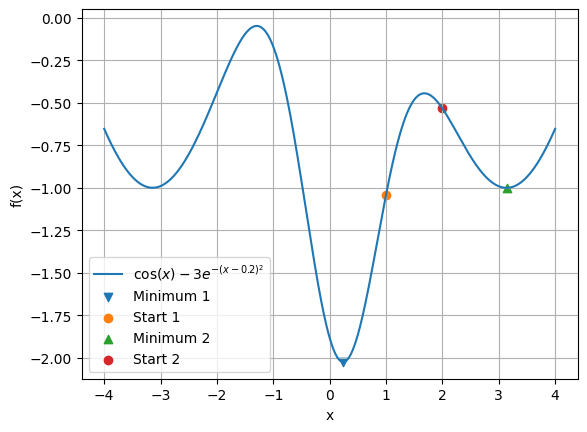

In [3]:
x0_1 = 1.0
x0_2 = 2.0

min1 = fmin(f, x0_1, disp=False)
min2 = fmin(f, x0_2, disp=False)

print(f"Local minimum starting from x0 = {x0_1}: x = {min1[0]:.4f}, f(x) = {f(min1[0]):.4f}")
print(f"Local minimum starting from x0 = {x0_2}: x = {min2[0]:.4f}, f(x) = {f(min2[0]):.4f}")

x = np.linspace(-4, 4, 500)
y = f(x)

plt.plot(x, y, label=r"$\cos(x) - 3e^{-(x-0.2)^2}$")

plt.scatter(min1, f(min1), label="Minimum 1", marker="v")
plt.scatter(x0_1, f(x0_1), label="Start 1", marker="o")

plt.scatter(min2, f(min2), label="Minimum 2", marker="^")
plt.scatter(x0_2, f(x0_2), label="Start 2", marker="o")

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

<h5 style="font-style:italic; font-size:16px;">Exercise 13 - Image manipulation: rotate, resize, add noise, and apply Gaussian, median, and Wiener filters using scipy.ndimage</h5>

c:\Users\Costea\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_signaltools.py:1647: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
c:\Users\Costea\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_signaltools.py:1647: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


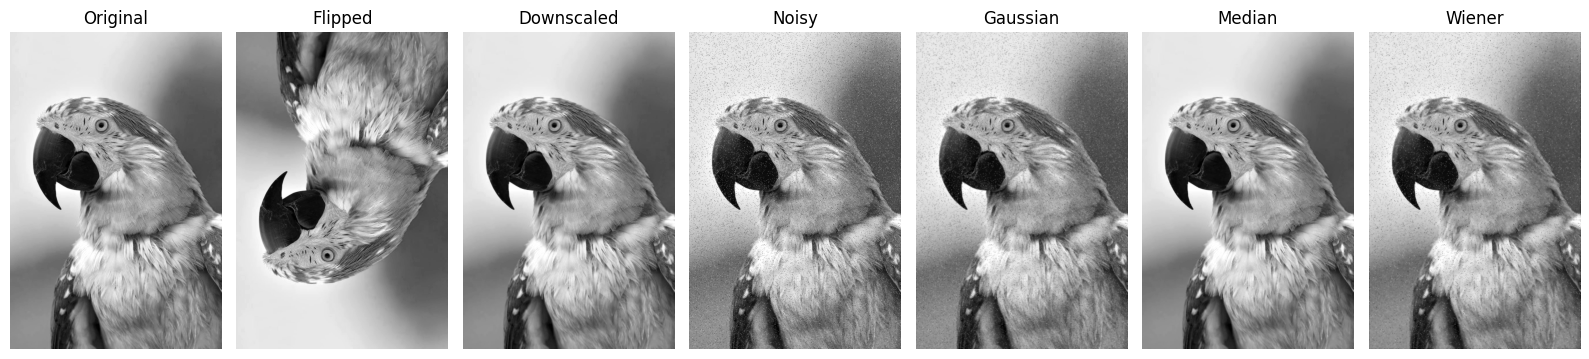

In [16]:
image = io.imread('https://img.freepik.com/free-photo/closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg?semt=ais_hybrid&w=740&q=80')
image = image[:, :, 0]

flipped = np.flipud(image)
rescaled = rescale(image, 0.5, anti_aliasing=True)
noisy = random_noise(image, mode='s&p', amount=0.05)
gaussian = gaussian_filter(noisy, sigma=1)
median = median_filter(noisy, size=3)
wiener_f = wiener(noisy, (5,5))

images = [image, flipped, rescaled, noisy, gaussian, median, wiener_f]
titles = ["Original", "Flipped", "Downscaled", "Noisy", "Gaussian", "Median", "Wiener"]

plt.figure(figsize=(16, 6))
for i, (img, title) in enumerate(zip(images, titles), 1):
    plt.subplot(1, 7, i)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()